优化算法:使用Keras提供的其他优化器，如梯度下降，看在其他算法下模型参数对模型训练和过拟合的速度有怎样的影响。
损失函数:尝试使用Keras其他可用的损失函数，探究选用其他的损失函数是否可以提升模型的性能。
学习率与迭代次数更新策略
更大的Batch Size:使用更大的Batch Size意味着模型在训练集和测试集上的数据操作规模更大了

In [1]:
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.applications.inception_v3 import preprocess_input
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

from keras.layers import *
#from keras.layers import Input
from keras.models import *
#from keras.models import Model
#from keras.layers import Input, Dense
#a = Input(shape=(32,))
#b = Dense(32)(a)
#model = Model(inputs=a, outputs=b)
from keras.callbacks import *
from keras.optimizers import *
from keras.regularizers import *
from keras import initializers
from keras.applications import *

plt.ion()   # interactive mode 画图不阻止程序运行
#from keras.utils import multi_gpu_model 
#from keras.applications import ResNet50
#from keras.applications import VGG16
#from keras.applications import VGG19
#from keras.applications import Xception # TensorFlow ONLY
#from keras.applications import InceptionResNetV2
#from keras.applications import InceptionV3

#tf.keras.applications.inception_v3.InceptionV3
#tf.keras.applications.inception_resnet_v2.InceptionResNetV2
####################################################################
#设置GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
#os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

#设置项
#看具体的模型参数设置在:https://www.tensorflow.org/api_docs/python/tf/keras/applications
#MODELS = {"InceptionResNetV2":InceptionResNetV2}
MODELS = {"DenseNet121":DenseNet121}
#"InceptionV3":InceptionV3,"DenseNet121":DenseNet121,
 #       "DenseNet169":DenseNet169,"DenseNet201":DenseNet201,"Xception":Xception, 
 #       "InceptionResNetV2":InceptionResNetV2,
#"ResNet50":ResNet50, 
#"VGG16":VGG16,"VGG16":VGG19,"NASNetMobile":NASNetMobile

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

classes = ['collar_design_labels', 'neckline_design_labels', 'skirt_length_labels', 
           'sleeve_length_labels', 'neck_design_labels', 'lapel_design_labels', 
           'pant_length_labels','coat_length_labels']   
#classes = ['pant_length_labels','coat_length_labels']    
fai_result = []

Using TensorFlow backend.


######################在DenseNet121下训练8个分类器####################
#######DenseNet121:collar_design_labels####################
选择的属性为:collar_design_labels, 种类的为:5,样本数: 8393
数据装载到内存完毕:DenseNet121,collar_design_labels
Train on 7553 samples, validate on 840 samples
Epoch 1/32
7553/7553 [==============================] - 124s 16ms/step - loss: 1.1109 - acc: 0.5788 - val_loss: 0.7319 - val_acc: 0.7405

Epoch 00001: val_loss improved from inf to 0.73192, saving model to ../models/collar/collar_DenseNet121.best.h5
Epoch 2/32
7553/7553 [==============================] - 105s 14ms/step - loss: 0.6084 - acc: 0.7794 - val_loss: 0.5725 - val_acc: 0.7940

Epoch 00002: val_loss improved from 0.73192 to 0.57250, saving model to ../models/collar/collar_DenseNet121.best.h5
Epoch 3/32
7553/7553 [==============================] - 105s 14ms/step - loss: 0.3802 - acc: 0.8660 - val_loss: 0.7077 - val_acc: 0.7440

Epoch 00003: val_loss did not improve
Epoch 4/32
7553/7553 [==============================] - 100s 


Epoch 00012: val_loss did not improve
[]
#######DenseNet121:pant_length_labels####################
选择的属性为:pant_length_labels, 种类的为:6,样本数: 7460
数据装载到内存完毕:DenseNet121,pant_length_labels
Train on 6714 samples, validate on 746 samples
Epoch 1/32
6714/6714 [==============================] - 130s 19ms/step - loss: 1.0133 - acc: 0.6171 - val_loss: 0.6375 - val_acc: 0.7708

Epoch 00001: val_loss improved from inf to 0.63750, saving model to ../models/pant/pant_DenseNet121.best.h5
Epoch 2/32
6714/6714 [==============================] - 96s 14ms/step - loss: 0.5112 - acc: 0.8147 - val_loss: 0.5112 - val_acc: 0.8231

Epoch 00002: val_loss improved from 0.63750 to 0.51124, saving model to ../models/pant/pant_DenseNet121.best.h5
Epoch 3/32
6714/6714 [==============================] - 96s 14ms/step - loss: 0.3154 - acc: 0.8877 - val_loss: 0.5774 - val_acc: 0.8029

Epoch 00003: val_loss did not improve
Epoch 4/32
6714/6714 [==============================] - 99s 15ms/step - loss: 0.2264 - acc: 0.9197

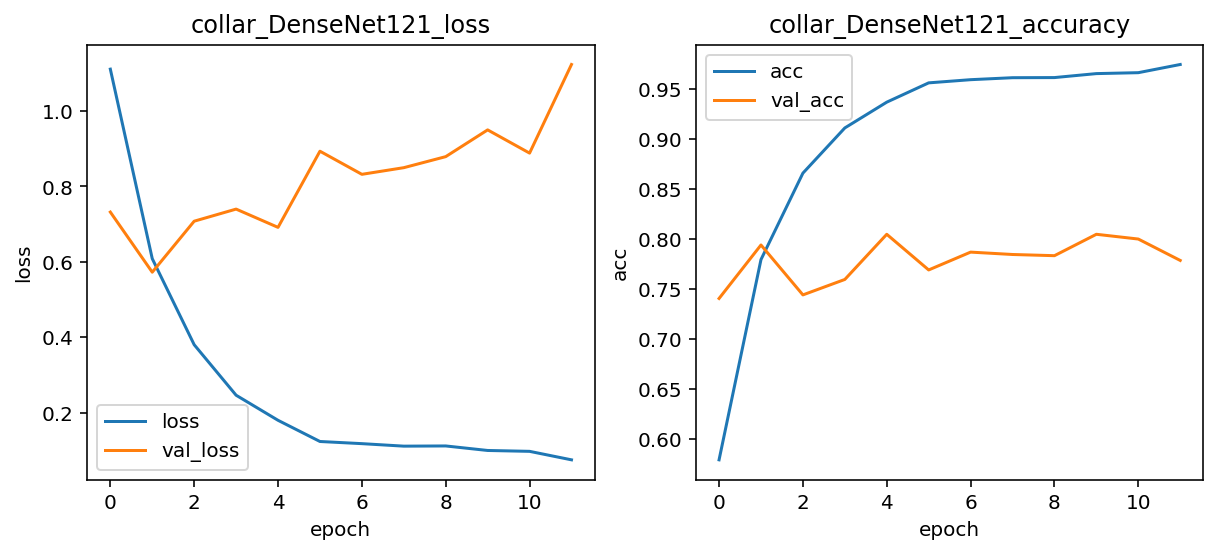

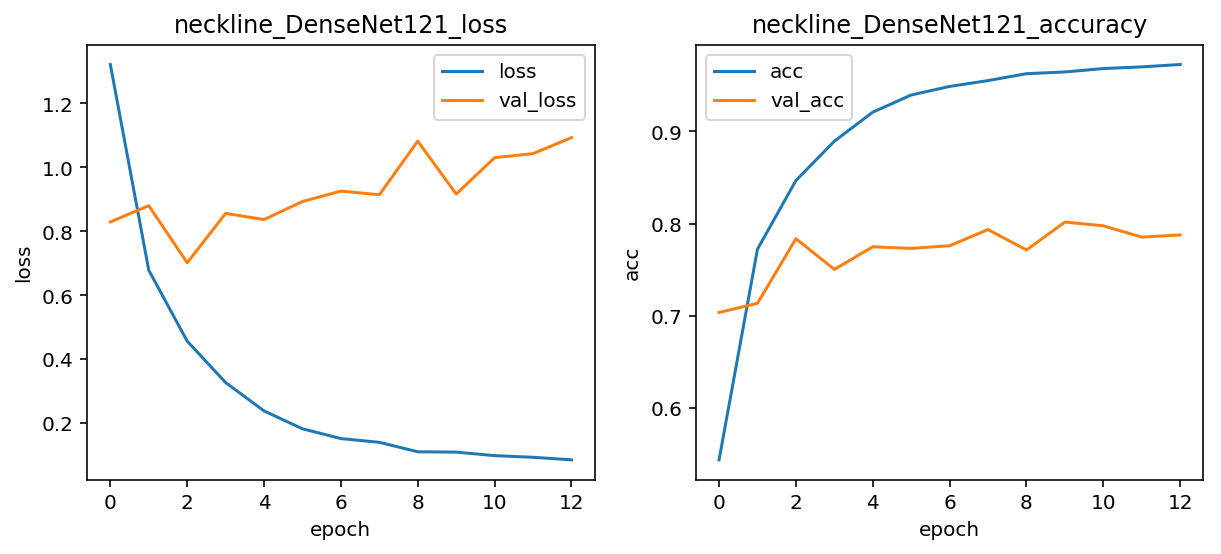

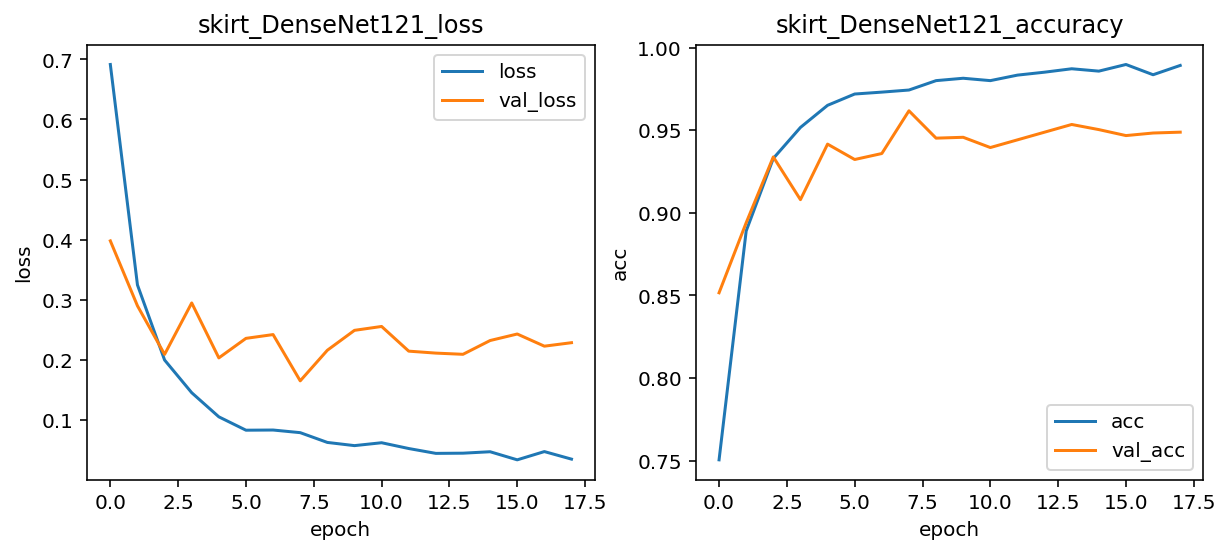

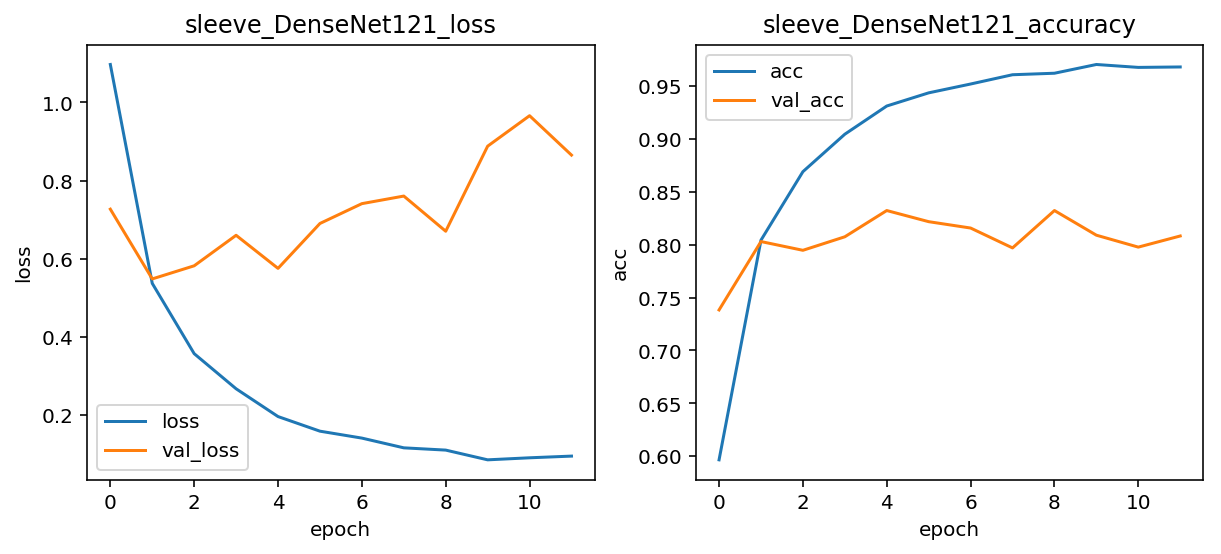

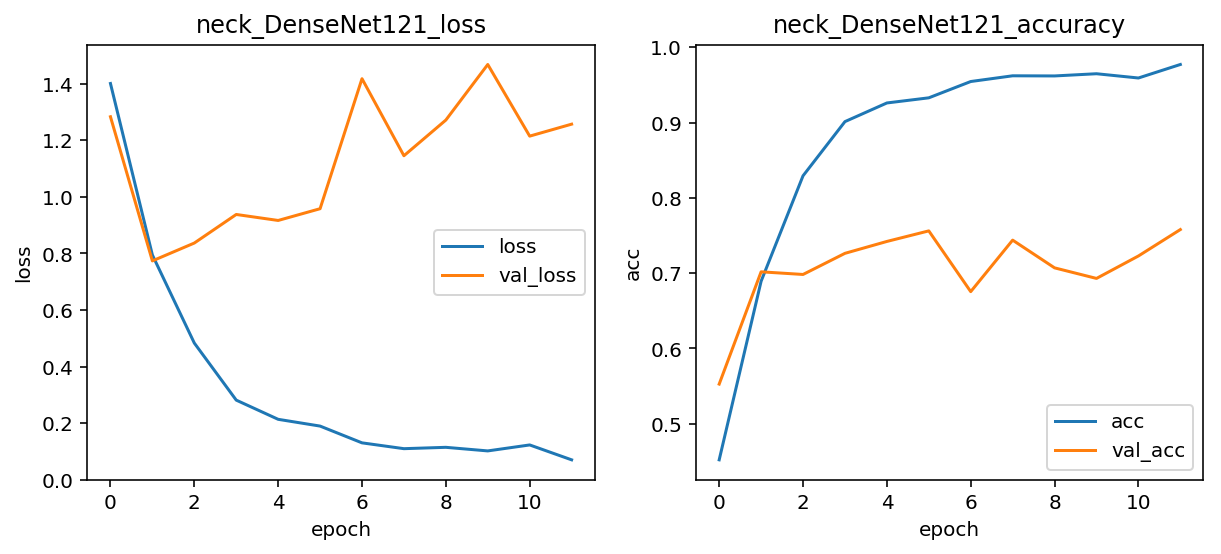

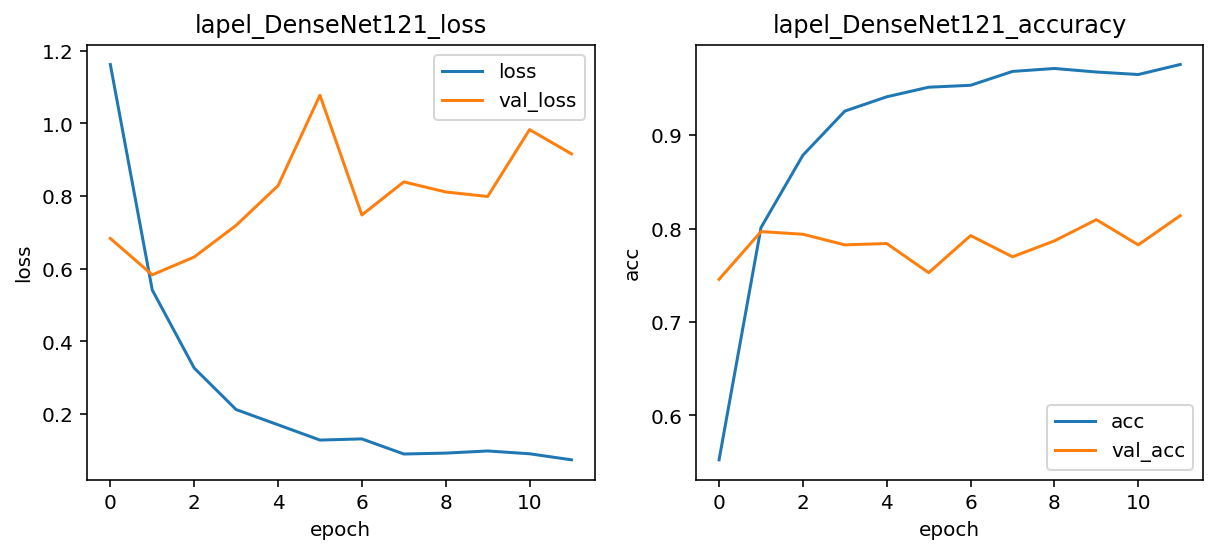

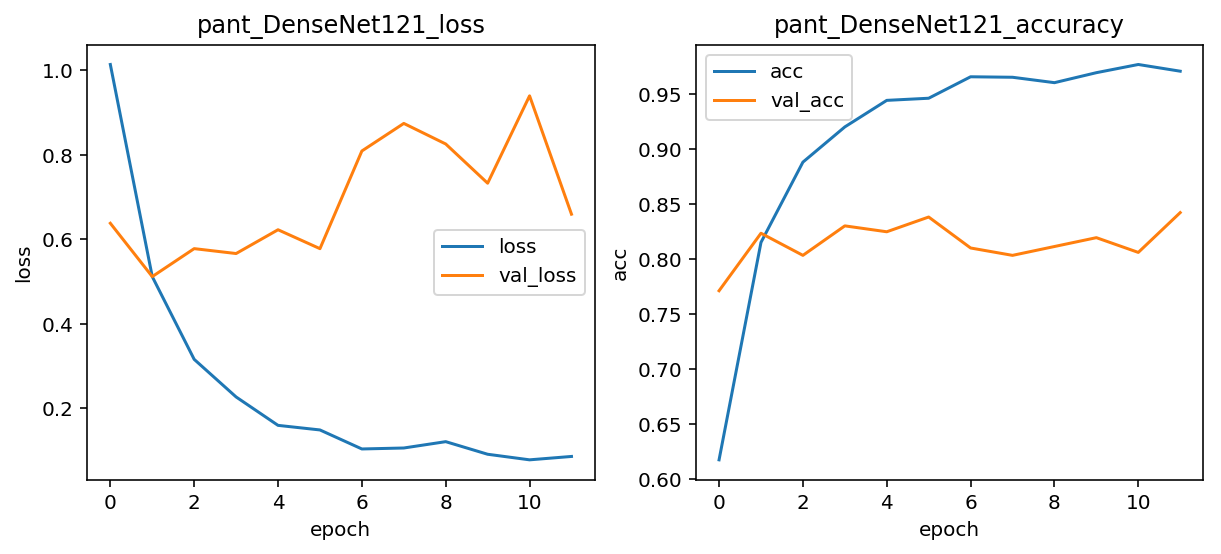

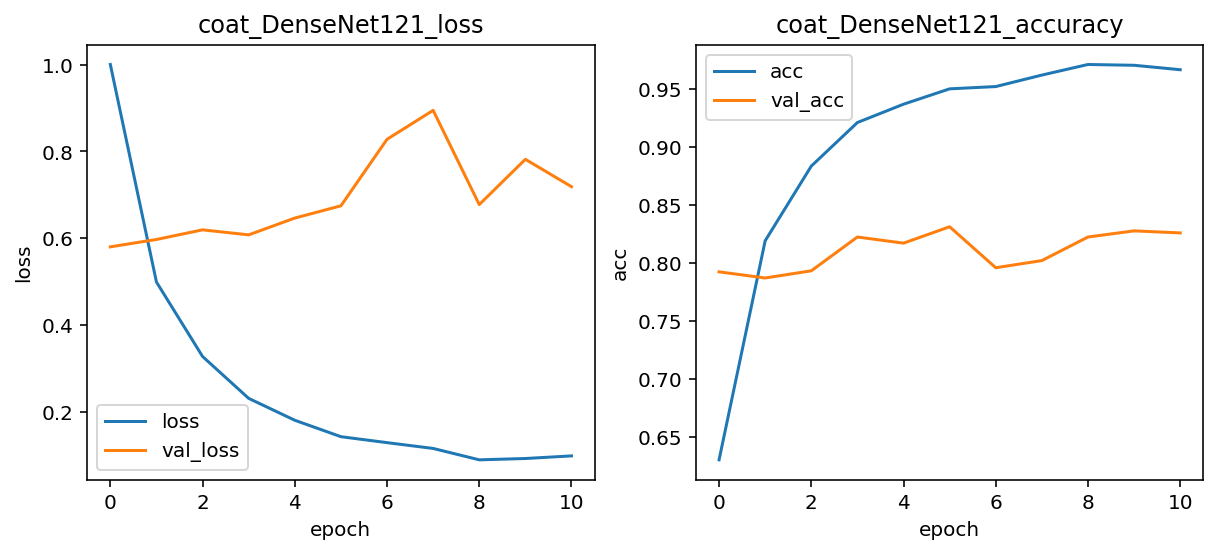

In [2]:
for KEY, MODLE in MODELS.items():
    #
    #为299*299,设置如下
    ppreprocess = preprocess_input
    if KEY in ["InceptionV3","Xception", "InceptionResNetV2"]:
        width = 299
    elif KEY == "NASNetLarge":
        width = 331
    else:
        width = 224
        ppreprocess = imagenet_utils.preprocess_input 
    print('######################在{0}下训练8个分类器####################'.format(KEY))
    for cur_class in classes:
        print('#######{0}:{1}####################'.format(KEY,cur_class ))
        df_train = pd.read_csv('../train/Annotations/{0}.csv'.format(cur_class), header=None)
        df_train.columns = ['image_id', 'class', 'label']
        df_load = df_train.copy()
        df_load.reset_index(inplace=True)
        del df_load['index']
        print("选择的属性为:{0}, 种类的为:{1},样本数: {2}".format(cur_class , len(df_load['label'][0]),len(df_load)))
        
        n = len(df_load)
        n_class = len(df_load['label'][0])
        prefix_cls = cur_class.split('_')[0]
        
        X = np.zeros((n, width, width, 3), dtype=np.uint8)
        y = np.zeros((n, n_class), dtype=np.uint8)
        for i in range(n):
            tmp_label = df_load['label'][i]
            if len(tmp_label) > n_class:
                print(df_load['image_id'][i])
            X[i] = cv2.resize(cv2.imread('../train/{0}'.format(df_load['image_id'][i])), (width, width))
            y[i][tmp_label.find('y')] = 1
        print("数据装载到内存完毕:{0},{1}".format(KEY,cur_class))
        #plt.figure(figsize=(12, 7))
        #for i in range(8):
            #random_index = random.randint(0, n-1)
            #plt.subplot(2, 4, i+1)
            #plt.imshow(X[random_index][:,:,::-1])
            #plt.title(y[random_index])
        #plt.savefig('../images/{0}/{0}_{1}.png'.format(prefix_cls, KEY),bbox_inches='tight')
        
        #设置模型的finetune细节
        cnn_model = MODLE(include_top=False, input_shape=(width, width, 3), weights='imagenet',pooling='avg')
        inputs = Input((width, width, 3))
        x = inputs
        x = Lambda(ppreprocess, name='preprocessing')(x)
        x = cnn_model(x)
        #下面是新加的层
        #x = GlobalAveragePooling2D()(x)
        x = Dropout(0.5)(x)
        #x = Flatten(name='flatten')(x)
        #x = Dense(2048, activation='relu', name='fc1')(x)
        # n_class为对应属性的分类个数
        x = Dense(256, activation='relu', kernel_initializer=initializers.he_uniform(seed=None),name='fc1')(x)
        x = Dense(n_class, activation='softmax', name='softmax')(x)

        model = Model(inputs, x)
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=50)
        
        #sgd = SGD(lr=learning_rate, decay=learning_rate/nb_epoch, momentum=0.9, nesterov=True)
        #adam = optimizers.Adam(lr=1e-4)
        #optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
        adam = Adam(lr=0.0001)
        
        #多GPU训练,因为keras设计的自动保存最好模型,但是多GPU训练,其save()就没法用了
        #model = multi_gpu_model(model, 2)  

        model.compile(optimizer=adam,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Callback that implements learning rate schedule
#schedule = Step([20], [1e-4, 1e-6])
#history = model.fit(X_train, Y_train,
#                    batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test,Y_test),
#                    callbacks=[
#                           schedule,
#                           keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0,save_best_only=True, mode='auto')

# 该回调函数将在每个epoch后保存模型到filepath
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0,save_best_only=True, mode='auto')
# 当监测值不再改善时，该回调函数将中止训练.
#当early stop被激活（如发现loss相比上一个epoch训练没有下降），则经过patience个epoch后停止训练
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

        #设置训练完之后,最好的模型保存路径
        checkpointer = ModelCheckpoint(filepath='../models/{0}/{0}_{1}.best.h5'.format(prefix_cls,KEY), verbose=1, 
                                    save_best_only=True)
        #训练开始,并保存训练过程的loss和acc变化
        h = model.fit(X_train, y_train, batch_size=16, epochs=32, 
                      callbacks=[EarlyStopping(patience=10), checkpointer], 
                      shuffle=True, 
                      validation_data=(X_valid,y_valid))
        #是指取最后一个epochs训练得到的模型做一次整个验证集的准确率测试
        #score = model.evaluate(X_valid,y_valid,batch_size=32,verbose=0)
        #print ('{0}_{1}验证平均accuracy:{2}'.format(prefix_cls,KEY,score[1]))
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(h.history['loss'])
        plt.plot(h.history['val_loss'])
        plt.legend(['loss', 'val_loss'])
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('{0}_{1}_loss'.format(prefix_cls, KEY))
        
        plt.subplot(1, 2, 2)
        plt.plot(h.history['acc'])
        plt.plot(h.history['val_acc'])
        plt.legend(['acc', 'val_acc'])
        plt.ylabel('acc')
        plt.xlabel('epoch')
        plt.title('{0}_{1}_accuracy'.format(prefix_cls, KEY))
        #保存训练损失和准确率变化的图像
        plt.savefig('../models/{0}/{0}_{1}.png'.format(prefix_cls, KEY),bbox_inches='tight')
        
        #print("训练集下,取一个大batch,{0}在模型{1}下的loss,accuracy={2}:".format(prefix_cls,KEY,model.evaluate(X_train, y_train, batch_size=256)))
        #print("验证集下,取一个大batch,{0}在模型{1}下的loss,accuracy={2}:".format(prefix_cls,KEY,model.evaluate(X_valid, y_valid, batch_size=256)))
        for valacc in h.history['val_acc']:
            if valacc > 83:
                fai_result.append['{0}_{1}'.format(prefix_cls, KEY)]
    
        #测试集上预测并输出结果
        df_test = pd.read_csv('../test/Tests/question.csv', header=None)
        df_test.columns = ['image_id', 'class', 'x']
        del df_test['x']
        
        df_load = df_test[(df_test['class'] == cur_class)].copy()
        df_load.reset_index(inplace=True)
        del df_load['index']
        
        n = len(df_load)
        X_test = np.zeros((n, width, width, 3), dtype=np.uint8)

        for i in range(n):
            X_test[i] = cv2.resize(cv2.imread('../test/{0}'.format(df_load['image_id'][i])), (width, width))
        test_np = model.predict(X_test, batch_size=256)
        result = []
        for i, row in df_load.iterrows():
            tmp_list = test_np[i]
            tmp_result = ''
            for tmp_ret in tmp_list:
                tmp_result += '{:.4f};'.format(tmp_ret)

            result.append(tmp_result[:-1])

        df_load['result'] = result     
        df_load.to_csv('../result/{1}/{0}_{1}.csv'.format(prefix_cls, KEY), header=None, index=False)
        print(fai_result)

In [3]:
print(fai_result)

[]
